# Sensor on leg
Purpose of this experiment is to survey a motion of the skateboard during a skateboard trick called **Ollie**. I measure two physical quantities: gyroscope speed [rad/s] and acceleration [m/s^2]. Each quantity is represented by its x,y,z component. A smartphone and its app Phyphox works as a sensor estimating and calculating the movement and provides data to xls files. The smartphone was stuck on my leg. I made ten attempts.

The script that is processing data is written in Python. I use popular libraries such as: Pandas, NumPy, and Matplolib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Experiment consists of 10 measurements. 

In [2]:
video_time = {
    "Exp1" : "0.19",
    "Exp2" : "1.20",
    "Exp3" : "2:20",
    "Exp4(5)" : "3:07",
    "Exp5" : "4:20",
    "Exp6(7)" : "5:35",
    "Exp7(8)" : "6:30",
    "Exp8(9)" : "7:15",
    "Exp9(10)" : "7:55",
    "Exp10(11)" : "8:35 "
}

URL_keys_leg = {
    "Exp2" : '1u2JN_yVS9I-aDDk-xtRFLs9SDdrUNo0f',
    "Exp3" : '1qolBHxLSiGi-bmDUZ-V0WzaCay7UaA3x',
    "Exp4(5)" : '1eEh3oZpFoCo4dGdcVoGH6kuwIe7QY6rr',
    "Exp5" : '1P3E_T65CdJncewSVA-3H8hveejoqcdy4',
    "Exp6(7)" : '1kFniM6vHQVy659t0I4R86xH6bfGgo97K',
    "Exp7(8)" : '19j6veOIvJoe3aln1MURMChglvMA2F5AS',
    "Exp8(9)" : '1akmRWg8bhkKlAQV0XimEPTzsa7_UvazU',
    "Exp9(10)" : '1llYUn_deIMOUQl14-aJL9Gw5BqT3nH53',
    "Exp10(11)" : '1hdnEeKw7eb2bEvJLbtd12irF3N5qIFmc'
}

Each attempt takes 20 seconds, but only 2-3 seconds are vital. Following "ranges" focus on the most critical data for further analysis.

In [25]:
ranges = {
#    "Exp2" : [500,900],
    "Exp2" : [300,900],
    "Exp3" : [600,1000],
    "Exp4(5)" : [300,1000],
#    "Exp4(5)" : [745,765],
    "Exp5" : [300,1000],
#    "Exp5" : [740,760],
    "Exp6(7)" : [600,1000],
#    "Exp7(8)" : [550,950],
    "Exp7(8)" : [680,700],    
    "Exp8(9)" : [300,1100],
#    "Exp8(9)" : [820,850],
    "Exp9(10)" : [1250,1750],
    "Exp10(11)" : [300,1100]
}

classification = {
    "Exp2" : "good",
    "Exp3" : "bad",
    "Exp4(5)" : "good",
    "Exp5" : "good",
    "Exp6(7)" : "bad",
    "Exp7(8)" : "good",
    "Exp8(9)" : "good",
    "Exp9(10)" : "bad",
    "Exp10(11)" : "good"
}

This script downloads data from Google Sheets, converts headers and plots data into the graphs. Each attempt has two graphs: Gyroscope and Accelerometer. 

In [26]:
def import_from_google (ID,name):
    google_sheet_ID=ID
    work_sheet=name
    path='https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
        google_sheet_ID,
        work_sheet
    )

    data = pd.read_csv(path)
    
    if name=="Gyroscope":
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(rad/s)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    else:
        data.columns = [c.replace(' ', '_') for c in data.columns]
        data.columns = [c.replace('_(m/s^2)', '') for c in data.columns]
        data.columns = [c.replace('_(s)', '') for c in data.columns]
    
    return data

def print_graph (prefix,title,graphdata):
    plt.figure(figsize=(15,5))
    if title=="Gyroscope":
        title=prefix+" "+title
        plt.title(title)
        plt.plot(graphdata.Time, graphdata.Gyroscope_x, color="red")
        plt.plot(graphdata.Time, graphdata.Gyroscope_y, color="blue")
        plt.plot(graphdata.Time, graphdata.Gyroscope_z, color="green")
        plt.show()
    if title=="Accelerometer":
        title=prefix+" "+title
        plt.title(title)
#        plt.plot(graphdata.index, graphdata.Acceleration_x, color="red")
        plt.plot(graphdata.index, graphdata.Acceleration_y, color="blue")
#        plt.plot(graphdata.index, graphdata.Acceleration_z, color="green")
#        plt.plot(graphdata.index, graphdata.mean_y, color="yellow")
        plt.show()
    else:
        print("NONE")

         Time  Acceleration_x  Acceleration_y  Acceleration_z     Diff_y
641  6.409399       -0.937330       39.221813       -2.990358  56.776100
642  6.419685       -1.980005       39.221813        2.337938  60.031017
643  6.429548       -3.457227       38.406586        4.079720  62.615557
644  6.439483       -5.031415       35.346798        4.782418  66.034479
645  6.449420      -13.019669       31.361649        4.812346  66.837730
646  6.459334      -22.965183       27.554867        2.055422  62.701748
647  6.469365      -24.914062       23.050177       -2.862268  58.979963
648  6.479384      -14.368801       18.977640       -1.929727  56.280500
       Time  Acceleration_x  Acceleration_y  Acceleration_z    Diff_y
0  0.000000       -0.651223        9.645041       -1.036689 -0.073023
1  0.009652       -0.630872        9.617508       -1.047463 -0.081403
2  0.019635       -0.628478        9.649830       -1.085770 -0.076614
3  0.029762       -0.626084        9.698911       -1.094150 -0.

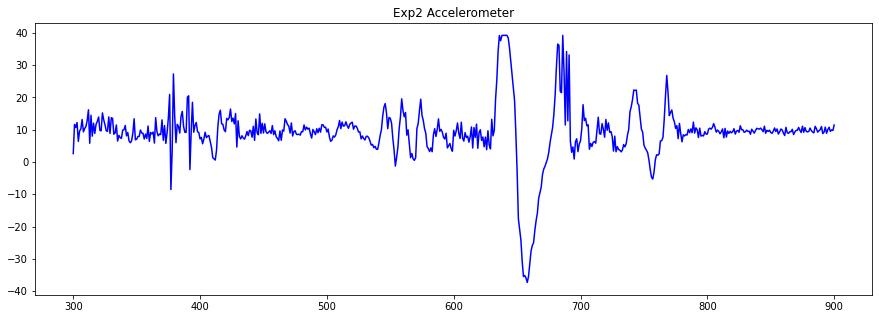

         Time  Acceleration_x  Acceleration_y  Acceleration_z     Diff_y
759  7.588834       -4.793192       39.221813        0.102951  53.493649
760  7.598864       -2.226608       39.221813        3.716998  55.970451
761  7.608776        1.188721       39.221813        4.171896  57.609282
762  7.618801        2.778471       37.439327        0.427365  58.745329
763  7.628750       -4.110844       29.847315        0.116119  54.605755
802  8.018718       -4.363432       23.926455       -3.343503  61.262835
803  8.028785        2.783259       23.324312        5.625177  56.076990
       Time  Acceleration_x  Acceleration_y  Acceleration_z    Diff_y
0  0.000000       -0.186748        9.932345       -0.543484  0.207098
1  0.009493       -0.175974        9.848549       -0.553061  0.155623
2  0.019259       -0.161609        9.751583       -0.578200  0.049081
3  0.029122       -0.184354        9.719262       -0.676362  0.007183
4  0.039048       -0.282516        9.761160       -0.812831  0.020

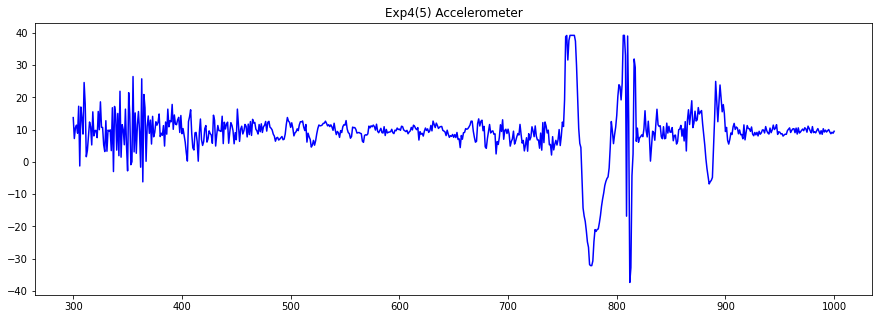

         Time  Acceleration_x  Acceleration_y  Acceleration_z     Diff_y
759  7.639565       -2.414552       39.221813        0.524330  57.014322
760  7.649335       -1.222240       39.221813        1.663970  57.290854
761  7.659626       -6.823475       39.221813        1.106121  55.654417
762  7.669388      -11.949461       37.125690       -0.350751  57.417748
763  7.679469      -15.241488       31.319750        3.263297  54.500410
801  8.059313       -9.459491       36.292507        0.476446  53.329647
803  8.079332      -28.450298       38.859089        1.022324  50.158524
       Time  Acceleration_x  Acceleration_y  Acceleration_z    Diff_y
0  0.000000       -1.295263        9.666590       -1.801637  0.073024
1  0.009747       -1.284489        9.646238       -1.763330  0.070628
2  0.019685       -1.169568        9.578004       -1.696292 -0.058658
3  0.029961       -1.134852        9.540894       -1.571793 -0.100556
4  0.039827       -0.945710        9.546879       -1.533486 -0.064

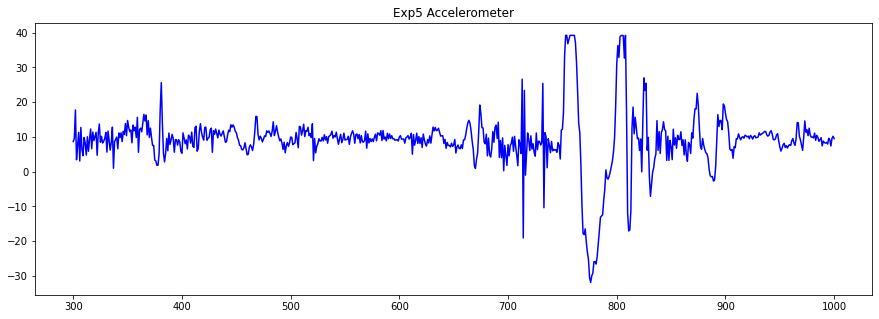

         Time  Acceleration_x  Acceleration_y  Acceleration_z     Diff_y
701  7.008884       -1.753753       39.221813        3.954024  50.162118
742  7.419005        6.373365       30.451851        7.881712  68.100674
       Time  Acceleration_x  Acceleration_y  Acceleration_z    Diff_y
0  0.000000       -0.306458        9.641450       -1.066617 -0.201114
1  0.009472       -0.385466        9.683349       -1.066617 -0.013168
2  0.019301       -0.417788        9.666590       -1.152808 -0.090980
3  0.029155       -0.377087        9.704897       -1.185130 -0.122104
4  0.039113       -0.325611        9.999383       -0.861913  0.179564
5  0.049130       -0.104148       10.025720       -0.547075  0.229843
6  0.059234        0.082600        9.859323       -0.338780  0.055067
7  0.069241        0.084994        9.762358       -0.362722 -0.046687
8  0.079111        0.232238        9.946711       -0.349553  0.262165
9  0.089055        0.524330       10.043676       -0.262165  0.531513


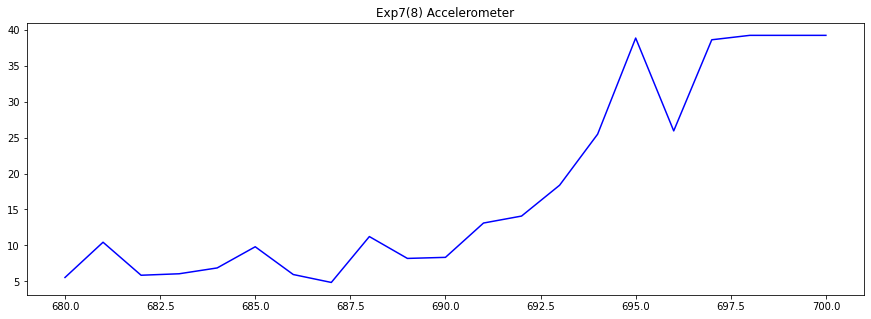

         Time  Acceleration_x  Acceleration_y  Acceleration_z     Diff_y
841  8.429778       -2.217031       39.221813       -1.642422  59.109249
842  8.439519       -2.175132       39.221813       -2.144008  74.981609
843  8.449480       -5.210980       39.221813       -4.423288  61.061722
844  8.459455       -3.803190       39.221813       -3.539827  51.306546
845  8.469691       -3.584120       39.057808       -1.594538  67.298614
846  8.479560      -10.105926       34.310108       -0.368707  70.724720
847  8.489527      -17.306486       27.716476        2.305616  53.296127
       Time  Acceleration_x  Acceleration_y  Acceleration_z    Diff_y
0  0.000000        0.090980        9.757569       -1.282095 -0.022744
1  0.009893        0.113725        9.765948       -1.278504 -0.010775
2  0.019826        0.159214        9.742006       -1.282095  0.011971
3  0.029821        0.192733        9.756371       -1.291672  0.071826
4  0.040194        0.201113        9.756371       -1.284489  0.033

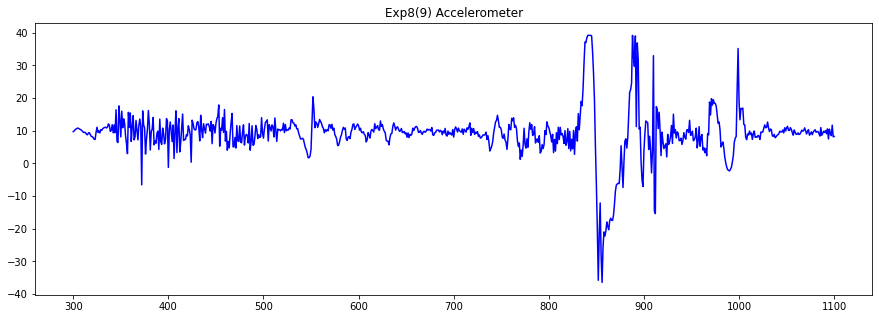

         Time  Acceleration_x  Acceleration_y  Acceleration_z     Diff_y
840  8.408837       -5.489904       39.221813       -1.069011  52.276198
843  8.439301       -5.135562       37.493198        3.072958  51.657295
886  8.868875      -20.210653       38.237797        5.626374  56.474432
887  8.879104       -9.970653       39.221813       -0.231040  56.791662
888  8.888768       39.017109       39.221813      -14.557943  52.490479
       Time  Acceleration_x  Acceleration_y  Acceleration_z    Diff_y
0  0.000000       -1.100136        9.712079       -0.744597 -0.027534
1  0.009451       -0.956484        9.725247       -0.735020  0.049081
2  0.019191       -0.988805        9.768343       -0.768539  0.120907
3  0.028969       -0.964863        9.737218       -0.800860  0.105345
4  0.038940       -0.966060        9.714474       -0.823605  0.017957
5  0.048881       -1.061828        9.708488       -0.849942 -0.071826
6  0.058888       -1.082179        9.685743       -0.864307 -0.096965
7 

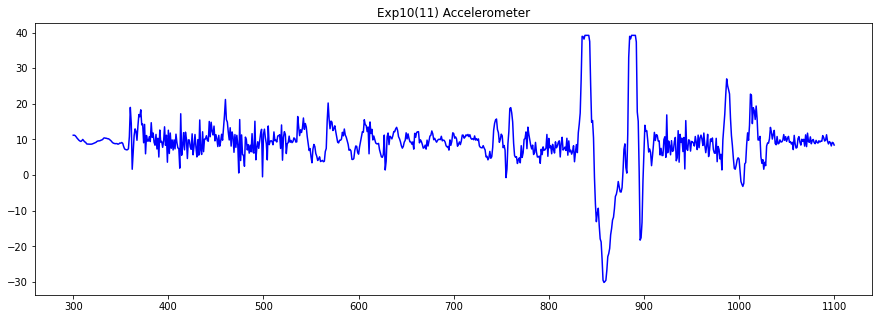

In [27]:

for i in URL_keys_leg:
    if classification[i]=="good":
        data_gyr = import_from_google(URL_keys_leg[i],"Gyroscope")
        data_acc = import_from_google(URL_keys_leg[i],"Accelerometer")

        data_acc["Diff_y"]=data_acc['Acceleration_y'].diff(periods=-10)
#        graphdata_acc["Diff_y"]=graphdata_acc["Diff_y"].abs()

#        data_acc["mean_y"]=data_acc['Acceleration_y'].diff(periods=-1)+data_acc['Acceleration_y']

#        graphdata_gyr["Diff_time"]=graphdata_gyr['Time'].diff(periods=-1)
#        graphdata_gyr=graphdata_gyr.round({"Time":2})
#        graphdata_acc=graphdata_acc.round({"Time":2})
        
        slope=data_acc.loc[data_acc["Diff_y"]>50]
        
        print(slope)
#        print(graphdata_gyr.head(n=5))
        print(data_acc.head(n=10))

    
            
        a,b=ranges[i]
        graphdata_gyr=data_gyr.loc[a:b,:]
        graphdata_acc=data_acc.loc[a:b,:]
        
#        print_graph(i,"Gyroscope",graphdata_gyr)
        print_graph(i,"Accelerometer",graphdata_acc)
        
        